## 复杂模型测试

使用COMMEMID 2D-0模型测试

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import matplotlib.colors as colors
from MT2D import *

In [2]:
# COMMEMI 2D-0 model reference apparent resistancy
obs_TE = np.array([-25,-15,-7,7,10,15,30])
rho_TE = np.array([8.0,4.7,1.5,1.1,1.3,1.7,2.0])
obs_TM = np.array([-25,-15,-10,0,10,15,30])
rho_TM = np.array([11.21,12.64,16.12,0.98,0.67,2.11,2.01])

In [3]:
def generate_model(nza):
    y = 10e3    # lenght in left and right 
    z = 50e3    # depth
#     n_freq = 5  
    nz = 50
    nz_b =10
    ny = 30
    
    z_air = np.linspace(-200e3,0,nza+1)
    zn0 = np.linspace(0, z, nz+1)
    z_b = np.linspace(zn0[-1],10*zn0[-1],nz_b+1)
    zn  = np.concatenate((z_air[:-1],zn0,z_b[1:]))
    # zn  = zn.reshape((len(zn),1))

    yn0 = np.linspace(-y,y,ny+1)
    y_l = np.linspace(5*yn0[0],yn0[0],ny+1)
    y_r = np.linspace(yn0[-1],5*yn0[-1],ny+1)
    yn  = np.concatenate((y_l[:-1],yn0,y_r[1:]))
    # yn  = yn.reshape((len(yn),1)) - np.min(yn)
#     y0 = yn-y_l[0]
    
    freq = np.array([1.0/300])
    # freq = freq.reshape((len(freq),1))
    ry = np.linspace(-30e3,30e3,100+1)
    # ry = ry.reshape((len(ry),1))-np.min(ry)

    sig = np.ones((nz+nz_b+nza,3*ny))*1e-2
    sig[:nza,:] = 1e-9
    sig[nza:nza+nz,0:ny] = 1.0/10
    sig[nza:nza+nz,ny:2*ny] = 1.0
    sig[nza:nza+nz,2*ny:] = 1.0/2
    
#     model0 = gr.gaussian_random_field(alpha = alpha, size = size_k, 
#                                    mode=mode, set_1=set_1, set_2=set_2)
#     model[int(size_b/2)+1:int(size_b/2)+size_k+1, :size_k] = model0
    return zn, yn, freq, ry, sig

In [4]:
nza = 10
zn, yn, freq, ry, sig = generate_model(nza)


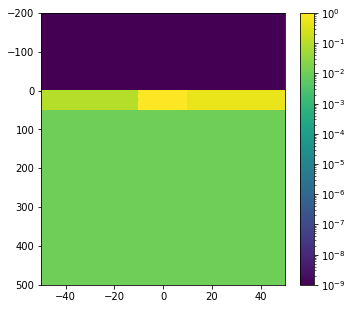

In [5]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
Y,Z = np.meshgrid(yn,zn)
h = ax.pcolormesh(Y/1e3,Z/1e3, sig, 
                  norm=colors.LogNorm(vmin=sig.min(), vmax=sig.max()),
                  )
ax.invert_yaxis()
fig.colorbar(h)
plt.show()

In [6]:

model = MT2DFD(nza, zn, yn, freq, ry, sig)

rhoxy, phsxy,Zxy,rhoyx,phsyx,Zyx  = model.mt2d("TETM")

frequency is: 300.0s



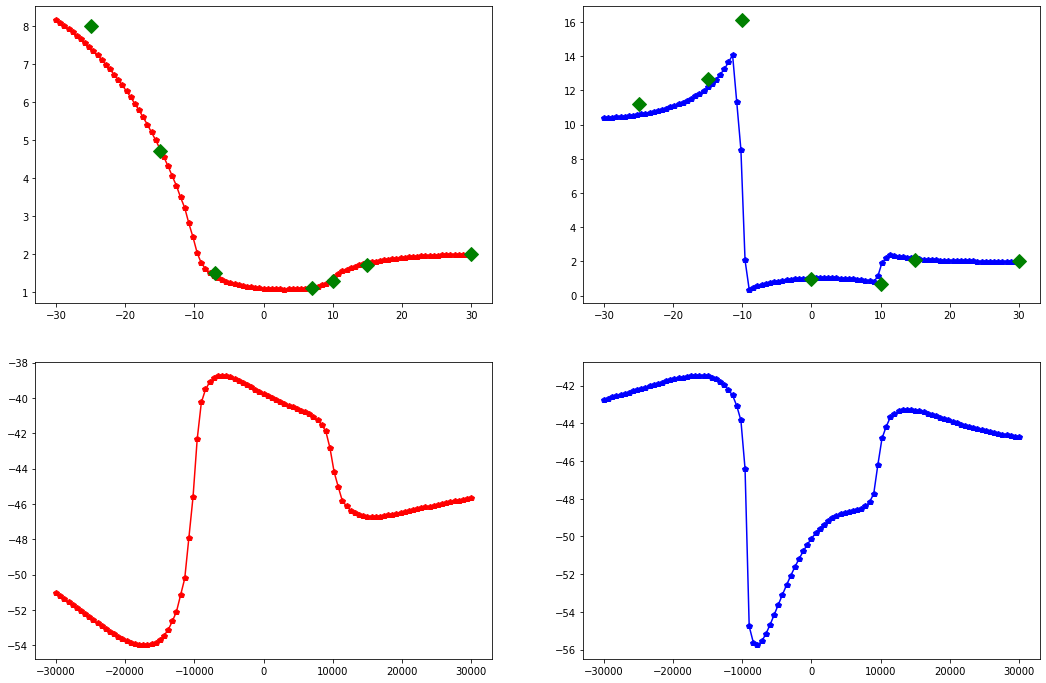

In [7]:
f_id = -1 # idx of frequency
print(f"frequency is: {1.0/freq[f_id]}s")
print("")
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(2,2,1)
ax.plot(ry/1e3, rhoxy[f_id,:], 'rp-',label="TE")
ax.plot(obs_TE, rho_TE, 'gD', markersize=10,label="COMMEMI")

ax = plt.subplot(2,2,2)
ax.plot(ry/1e3, rhoyx[f_id,:], 'bp-',label="TM")
ax.plot(obs_TM, rho_TM, 'gD', markersize=10,label="COMMEMI")
# ax.set_xscale("log")
# ax.invert_xaxis()
# ax.legend(loc='lower left',fontsize=12.5)
ax = plt.subplot(2,2,3)
ax.plot(ry, phsxy[f_id,:], 'rp-',label="TE")
ax = plt.subplot(2,2,4)
ax.plot(ry, phsyx[f_id,:]-180, 'bp-',label="TM")
# ax.set_xscale("log")
# ax.invert_xaxis()
# ax.legend(loc='lower left',fontsize=12.5)
plt.show()